# **Imports**

In [1]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/30/7d/41847e45ff075f3636c95d1000e0b75189aed4f1ae18c36812575bb42b4b/xgboost-3.1.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 660.6 kB/s eta 0:01:49
   ---------------------------------------- 0.0/72.0 MB 393.8 kB/s eta 0:03:03
   ---------------------------------------- 0.0/72.0 MB 393.8 kB/s eta 0:03:03
   ---------------------------------------- 0.1/72.0 MB 393.8 kB/s eta 0:03:03
   ---------------------------------------- 0.1/72.0 MB 514.3 kB/s eta 0:02:20
   ---------------------------------------- 0.2/72.0 MB 731.4 kB/s eta 0:01:39
   ---------------------------------------- 0.3/72.0 MB 785.2 kB/s eta 0:01:32
   ---------------------------------------- 0.4/72.0 MB 1.0 MB/s eta 0:01:11
   ---------------------------------------- 0.4/72.0 MB 1.1 MB/s eta 0:01:06
   ---------------


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, confusion_matrix, roc_auc_score

# **Data exploration and visualization**

In [3]:
df = pd.read_csv("E-commerce Data 1.csv")

In [4]:
df.head()

Customer ID Purchase Date Product Category  Product Price  Quantity  \
0        44605      03-05-23             Home            177         1   
1        44605      16-05-21      Electronics            174         3   
2        44605      13-07-20            Books            413         1   
3        44605      17-01-23      Electronics            396         3   
4        44605      01-05-21            Books            259         4   

   Total Purchase Amount Payment Method  Customer Age  Returns Customer Name  \
0                   2427         PayPal            31      1.0   John Rivera   
1                   2448         PayPal            31      1.0   John Rivera   
2                   2345    Credit Card            31      1.0   John Rivera   
3                    937           Cash            31      0.0   John Rivera   
4                   2598         PayPal            31      1.0   John Rivera   

   Gender  Churn  
0  Female      0  
1  Female      0  
2  Female      0  
3  Female      0  
4  Female      0

In [5]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Gender                       0
Churn                        0
dtype: int64

In [6]:
df.dropna(inplace = True)
df = df.reset_index(drop=True)

In [7]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Gender                   0
Churn                    0
dtype: int64

In [8]:
df.shape

(202618, 12)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202618 entries, 0 to 202617
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            202618 non-null  int64  
 1   Purchase Date          202618 non-null  object 
 2   Product Category       202618 non-null  object 
 3   Product Price          202618 non-null  int64  
 4   Quantity               202618 non-null  int64  
 5   Total Purchase Amount  202618 non-null  int64  
 6   Payment Method         202618 non-null  object 
 7   Customer Age           202618 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          202618 non-null  object 
 10  Gender                 202618 non-null  object 
 11  Churn                  202618 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 18.6+ MB


In [11]:
df["Purchase Date"]=pd.to_datetime(df["Purchase Date"],format = '%d-%m-%y')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202618 entries, 0 to 202617
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  int64         
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  int64         
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Gender                 202618 non-null  object        
 11  Churn                  202618 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), 

In [13]:
df.describe()

Customer ID               Purchase Date  Product Price  \
count  202618.000000                      202618  202618.000000   
mean    25020.140234  2021-11-06 14:54:31.551392     254.899066   
min         1.000000         2020-01-01 00:00:00      10.000000   
25%     12599.250000         2020-12-03 00:00:00     133.000000   
50%     25018.000000         2021-11-06 00:00:00     255.000000   
75%     37444.000000         2022-10-11 00:00:00     377.000000   
max     50000.000000         2023-09-13 00:00:00     500.000000   
std     14412.388674                         NaN     141.720425   

            Quantity  Total Purchase Amount   Customer Age        Returns  \
count  202618.000000          202618.000000  202618.000000  202618.000000   
mean        3.008420            2725.817662      43.817923       0.500824   
min         1.000000             100.000000      18.000000       0.000000   
25%         2.000000            1478.000000      30.000000       0.000000   
50%         3.000000            2727.000000      44.000000       1.000000   
75%         4.000000            3975.000000      57.000000       1.000000   
max         5.000000            5350.000000      70.000000       1.000000   
std         1.414339            1442.268491      15.356067       0.500001   

               Churn  
count  202618.000000  
mean        0.201088  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  
std         0.400815

In [14]:
df.to_csv('E-commerce.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202618 entries, 0 to 202617
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            202618 non-null  int64         
 1   Purchase Date          202618 non-null  datetime64[ns]
 2   Product Category       202618 non-null  object        
 3   Product Price          202618 non-null  int64         
 4   Quantity               202618 non-null  int64         
 5   Total Purchase Amount  202618 non-null  int64         
 6   Payment Method         202618 non-null  object        
 7   Customer Age           202618 non-null  int64         
 8   Returns                202618 non-null  float64       
 9   Customer Name          202618 non-null  object        
 10  Gender                 202618 non-null  object        
 11  Churn                  202618 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), 

In [16]:
df['Product Category'].value_counts()

Product Category
Clothing       50754
Home           50741
Electronics    50704
Books          50419
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

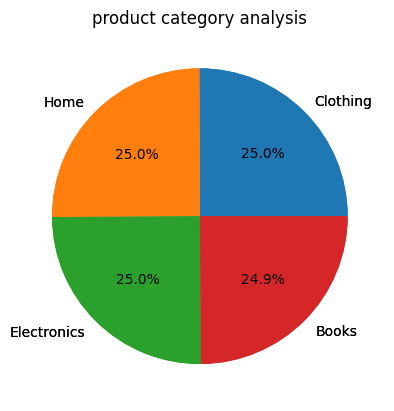

<Figure size 640x480 with 0 Axes>

In [17]:
df['Product Category'].value_counts().plot(kind='pie',title='product category analysis',xlabel='product categories',ylabel='')
y = [50754,50741, 50704, 50419]
my_labels = ["Clothing", "Home", "Electronics", "Books"]
plt.pie(y, labels = my_labels, autopct='%1.1f%%')
plt.figure()

In [18]:
df['Payment Method'].value_counts()

Payment Method
PayPal         67811
Credit Card    67517
Cash           67290
Name: count, dtype: int64

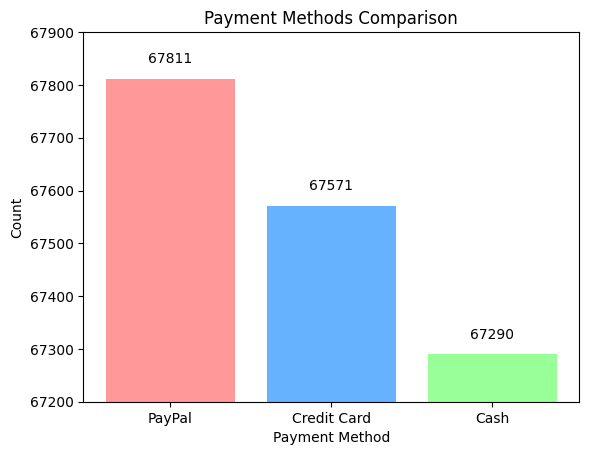

In [19]:

methods = ['PayPal', 'Credit Card', 'Cash']
counts = [67811, 67571, 67290]
plt.bar(methods, counts, color=['#FF9999','#66B2FF','#99FF99'])
plt.title('Payment Methods Comparison')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.ylim(67200, 67900)
for i, v in enumerate(counts):
   plt.text(i, v + 30, str(v), ha='center')
plt.show()

In [20]:
df['Gender'].value_counts()

Gender
Male      101919
Female    100699
Name: count, dtype: int64

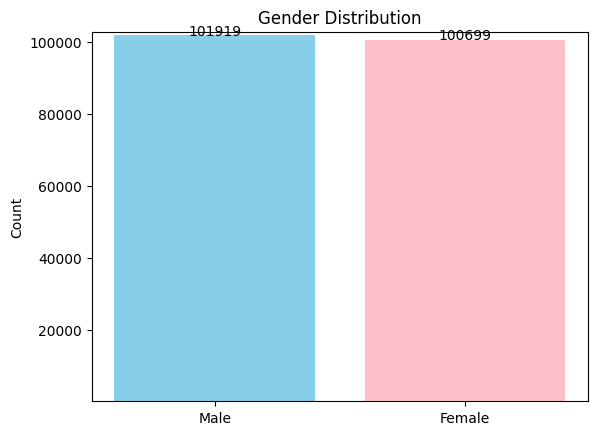

In [21]:

# Gender data
labels = ['Male', 'Female']
values = [101919, 100699]

# Create bar chart
plt.bar(labels, values, color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.ylim(100, max(values)+1000 )
for i, v in enumerate(values):
   plt.text(i, v + 30, str(v), ha='center')
plt.show()

In [22]:
df['Churn'].value_counts()

Churn
0    161874
1     40744
Name: count, dtype: int64

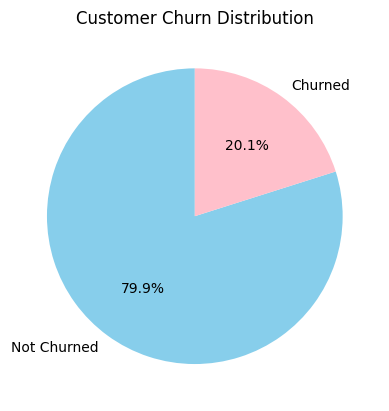

In [23]:

y = [161874, 40744]
my_labels = ["Not Churned", "Churned"]
plt.pie(y, labels=my_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Customer Churn Distribution")
plt.show()

In [24]:
product_churn=df.groupby('Product Category')['Churn'].mean()*100
product_churn

Product Category
Books          20.212618
Clothing       20.128463
Electronics    20.106895
Home           19.987781
Name: Churn, dtype: float64

<Figure size 640x480 with 0 Axes>

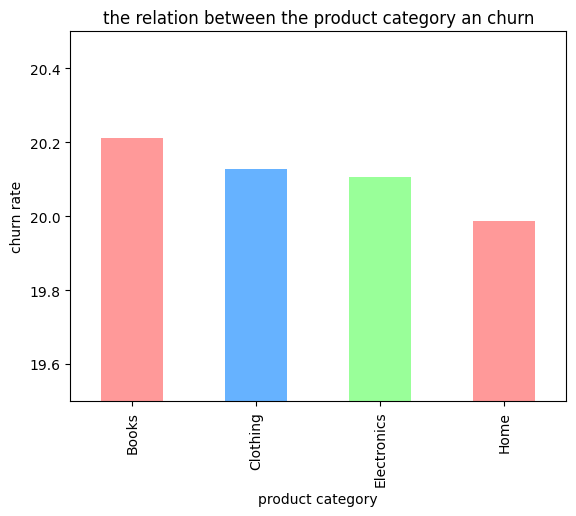

In [25]:
product_churn.plot(kind='bar',title='the relation between the product category an churn', xlabel='product category',ylabel='churn rate',color=['#FF9999','#66B2FF','#99FF99'])
v=[20.212618,20.128463,20.106895,19.987781]
plt.ylim(19.5,20.5)
plt.Figure()

In [26]:
payment_churn=df.groupby('Payment Method')['Churn'].mean()*100
payment_churn

Payment Method
Cash           20.291277
Credit Card    19.734289
PayPal         20.300541
Name: Churn, dtype: float64

<Figure size 640x480 with 0 Axes>

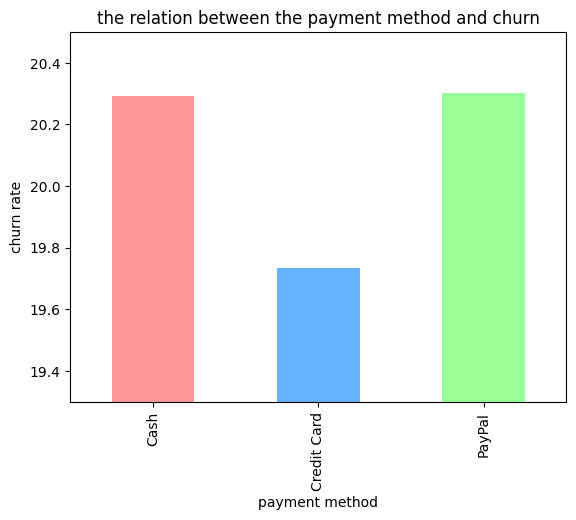

In [27]:
payment_churn.plot(kind='bar',title='the relation between the payment method and churn', xlabel='payment method',ylabel='churn rate',color=['#FF9999','#66B2FF','#99FF99'])
plt.ylim(19.3,20.5)
plt.Figure()

In [28]:
Gender_churn=df.groupby('Gender')['Churn'].mean()*100
Gender_churn

Gender
Female    20.218671
Male      20.000196
Name: Churn, dtype: float64

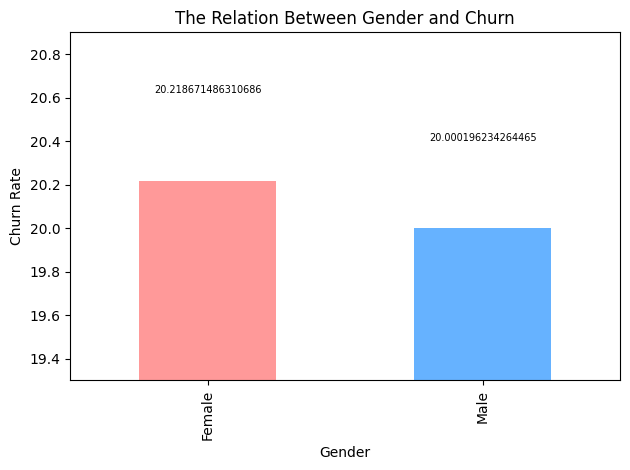

In [29]:

Gender_churn.plot(
    kind='bar',
    title='The Relation Between Gender and Churn',
    xlabel='Gender',
    ylabel='Churn Rate',
    color=['#FF9999', '#66B2FF', '#99FF99']
)
plt.ylim(19.3,20.9 )
for i, v in enumerate(Gender_churn):
    plt.text(i, v + (v * 0.02), str(v), ha='center',fontsize=7)
plt.tight_layout()
plt.show()

In [30]:
df[['Customer Age', 'Product Price', 'Quantity', 'Total Purchase Amount']].describe()

Customer Age  Product Price       Quantity  Total Purchase Amount
count  202618.000000  202618.000000  202618.000000          202618.000000
mean       43.817923     254.899066       3.008420            2725.817662
std        15.356067     141.720425       1.414339            1442.268491
min        18.000000      10.000000       1.000000             100.000000
25%        30.000000     133.000000       2.000000            1478.000000
50%        44.000000     255.000000       3.000000            2727.000000
75%        57.000000     377.000000       4.000000            3975.000000
max        70.000000     500.000000       5.000000            5350.000000

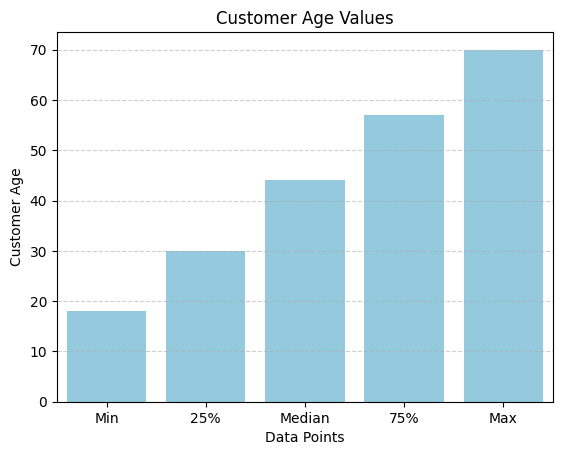

In [31]:

data = {'Customer Age': [18, 30, 44, 57, 70]}
df2 = pd.DataFrame(data)
sns.barplot(x=df2.index, y='Customer Age', data=df2, color='skyblue')
plt.title('Customer Age Values')
plt.xlabel('Data Points')
plt.ylabel('Customer Age')
plt.xticks(df2.index, ['Min', '25%', 'Median', '75%', 'Max'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

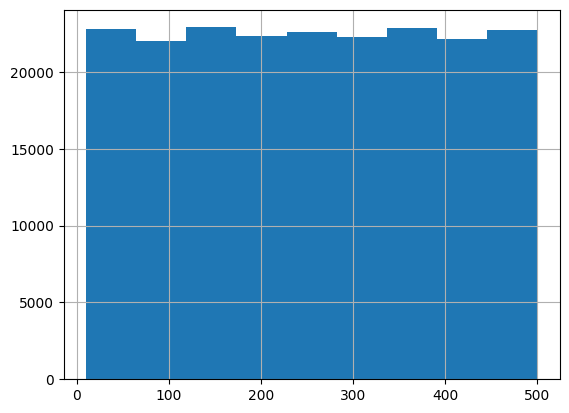

In [32]:
df['Product Price'].hist(bins=9)
plt.show()

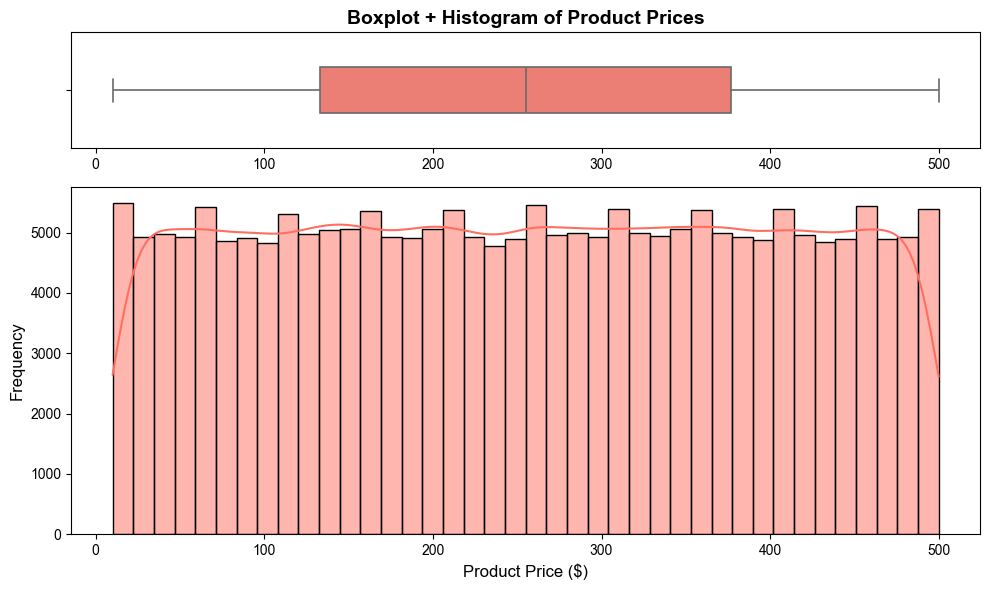

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})
sns.set_style("whitegrid")
sns.boxplot(
    x='Product Price',
    data=df,
    ax=ax[0],
    color='#FF6F61',
    width=0.4,
    fliersize=2,
    linewidth=1.2
)
sns.histplot(
    df['Product Price'],
    bins=40,
    kde=True,
    color='#FF6F61',
    edgecolor='black',
    ax=ax[1]
)
ax[0].set_title('Boxplot + Histogram of Product Prices', fontsize=14, fontweight='bold')
ax[0].set_xlabel('')
ax[1].set_xlabel('Product Price ($)', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

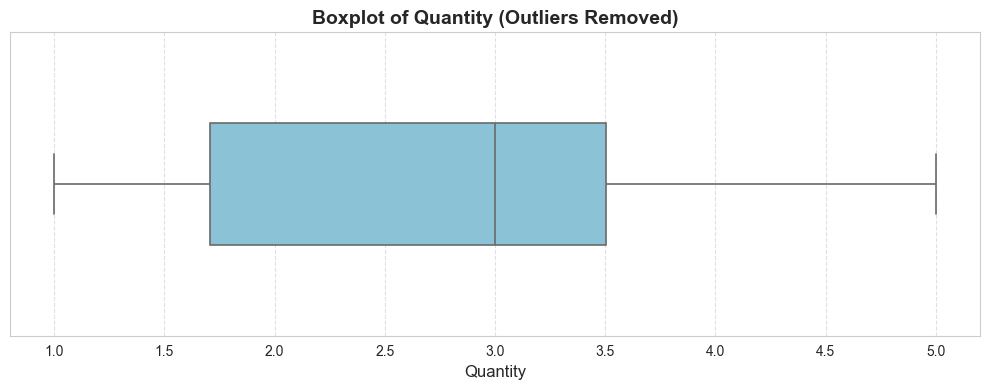

In [34]:

data = pd.DataFrame({
    'Quantity': [202618.000000, 3.008420, 1.414339, 1.000000, 2.000000, 3.000000, 4.000000, 5.000000]
})
filtered = data[data['Quantity'] < 1000]
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.boxplot(
    x='Quantity',
    data=filtered,
    color='#7EC8E3',
    width=0.4,
    fliersize=4,
    linewidth=1.2
)
plt.title('Boxplot of Quantity (Outliers Removed)', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

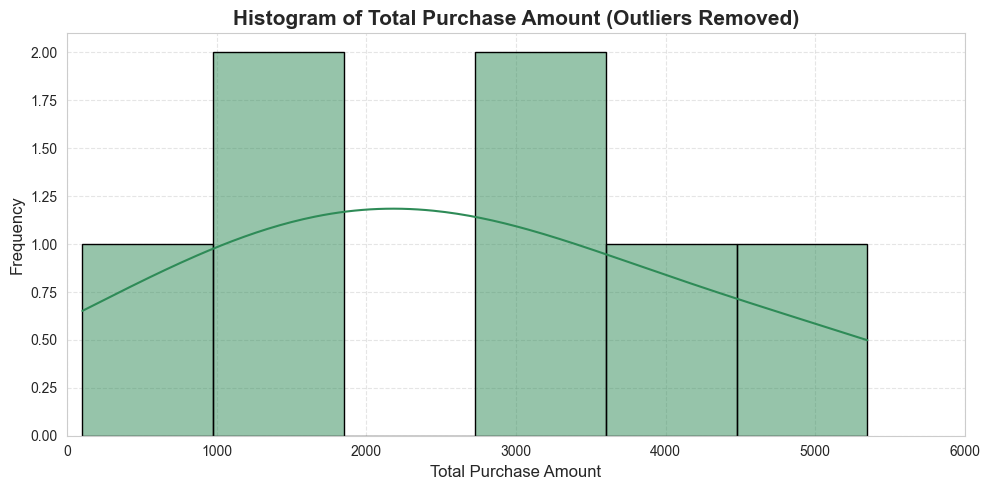

In [35]:

purchase_amounts = [
    202618.000000,
    2725.817662,
    100.000000,
    1478.000000,
    2727.000000,
    3975.000000,
    5350.000000,
    1442.268491
]
dff = pd.DataFrame({'Total Purchase Amount': purchase_amounts})
filtered_df = dff[dff['Total Purchase Amount'] < 10000]
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.histplot(
    filtered_df['Total Purchase Amount'],
    bins=6,
    kde=True,
    color='#2E8B57',
    edgecolor='black',
    linewidth=1
)
plt.title('Histogram of Total Purchase Amount (Outliers Removed)', fontsize=15, fontweight='bold')
plt.xlabel('Total Purchase Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 6000)
plt.tight_layout()
plt.show()

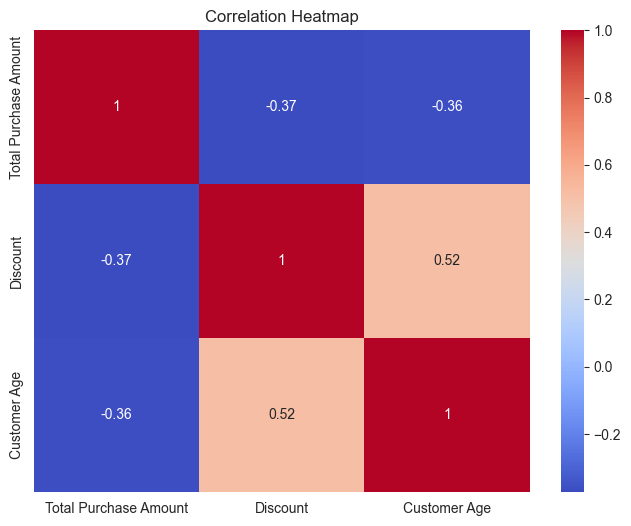

In [36]:

purchase_amounts = [
    202618.000000,
    2725.817662,
    1442.268491,
    100.000000,
    1478.000000,
    2727.000000,
    3975.000000,
    5350.000000
]
dfff = pd.DataFrame({
    'Total Purchase Amount': purchase_amounts,
    'Discount': [5, 10, 15, 2, 20, 25, 8, 12],
    'Customer Age': [25, 32, 40, 22, 30, 35, 28, 45]
})
plt.figure(figsize=(8, 6))
sns.heatmap(dfff.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Features**

In [37]:
df = pd.read_csv("E-commerce.csv")

In [38]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')


In [39]:
df = df.groupby(['Customer ID', 'Customer Name', 'Gender', 'Customer Age', 'Churn']).agg({
    'Total Purchase Amount':'sum',
    'Quantity':'mean',
    'Product Category': pd.Series.nunique,
    'Returns':'sum',
    'Payment Method': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Purchase Date':['min','max','count']
})



df.columns = ['total_spent','avg_quantity','num_categories','total_returns','most_common_payment','first_purchase','last_purchase','num_orders']
df = df.reset_index()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49146 entries, 0 to 49145
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer ID          49146 non-null  int64         
 1   Customer Name        49146 non-null  object        
 2   Gender               49146 non-null  object        
 3   Customer Age         49146 non-null  int64         
 4   Churn                49146 non-null  int64         
 5   total_spent          49146 non-null  int64         
 6   avg_quantity         49146 non-null  float64       
 7   num_categories       49146 non-null  int64         
 8   total_returns        49146 non-null  float64       
 9   most_common_payment  49146 non-null  object        
 10  first_purchase       49146 non-null  datetime64[ns]
 11  last_purchase        49146 non-null  datetime64[ns]
 12  num_orders           49146 non-null  int64         
dtypes: datetime64[ns](2), float64(2

In [41]:
from datetime import datetime

latest_date = df['last_purchase'].max()
df['recency_days'] = (latest_date - df['last_purchase']).dt.days
df['tenure_days'] = (df['last_purchase'] - df['first_purchase']).dt.days



In [42]:
df = df[['Customer ID','total_spent','avg_quantity','num_categories','total_returns','num_orders',
                   'recency_days','tenure_days','most_common_payment','Gender','Customer Age','Churn']]

# **Data preprocessing**

In [43]:
df.shape

(49146, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49146 entries, 0 to 49145
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          49146 non-null  int64  
 1   total_spent          49146 non-null  int64  
 2   avg_quantity         49146 non-null  float64
 3   num_categories       49146 non-null  int64  
 4   total_returns        49146 non-null  float64
 5   num_orders           49146 non-null  int64  
 6   recency_days         49146 non-null  int64  
 7   tenure_days          49146 non-null  int64  
 8   most_common_payment  49146 non-null  object 
 9   Gender               49146 non-null  object 
 10  Customer Age         49146 non-null  int64  
 11  Churn                49146 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 4.5+ MB


In [45]:
df.head()

Customer ID  total_spent  avg_quantity  num_categories  total_returns  \
0            1         5148      5.000000               1            0.0   
1            2        16481      3.000000               4            4.0   
2            3         4687      3.000000               1            0.0   
3            4         7826      3.800000               4            3.0   
4            5         7681      2.666667               2            3.0   

   num_orders  recency_days  tenure_days most_common_payment  Gender  \
0           1           888            0         Credit Card  Female   
1           6            72         1067              PayPal  Female   
2           1           222            0                Cash    Male   
3           5           441          625                Cash    Male   
4           3           537          640                Cash  Female   

   Customer Age  Churn  
0            67      0  
1            42      0  
2            31      0  
3            37      0  
4            24      0

In [46]:
df.drop(['Customer ID'], axis=1, inplace=True)

In [47]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["most_common_payment"] = le.fit_transform(df["most_common_payment"])

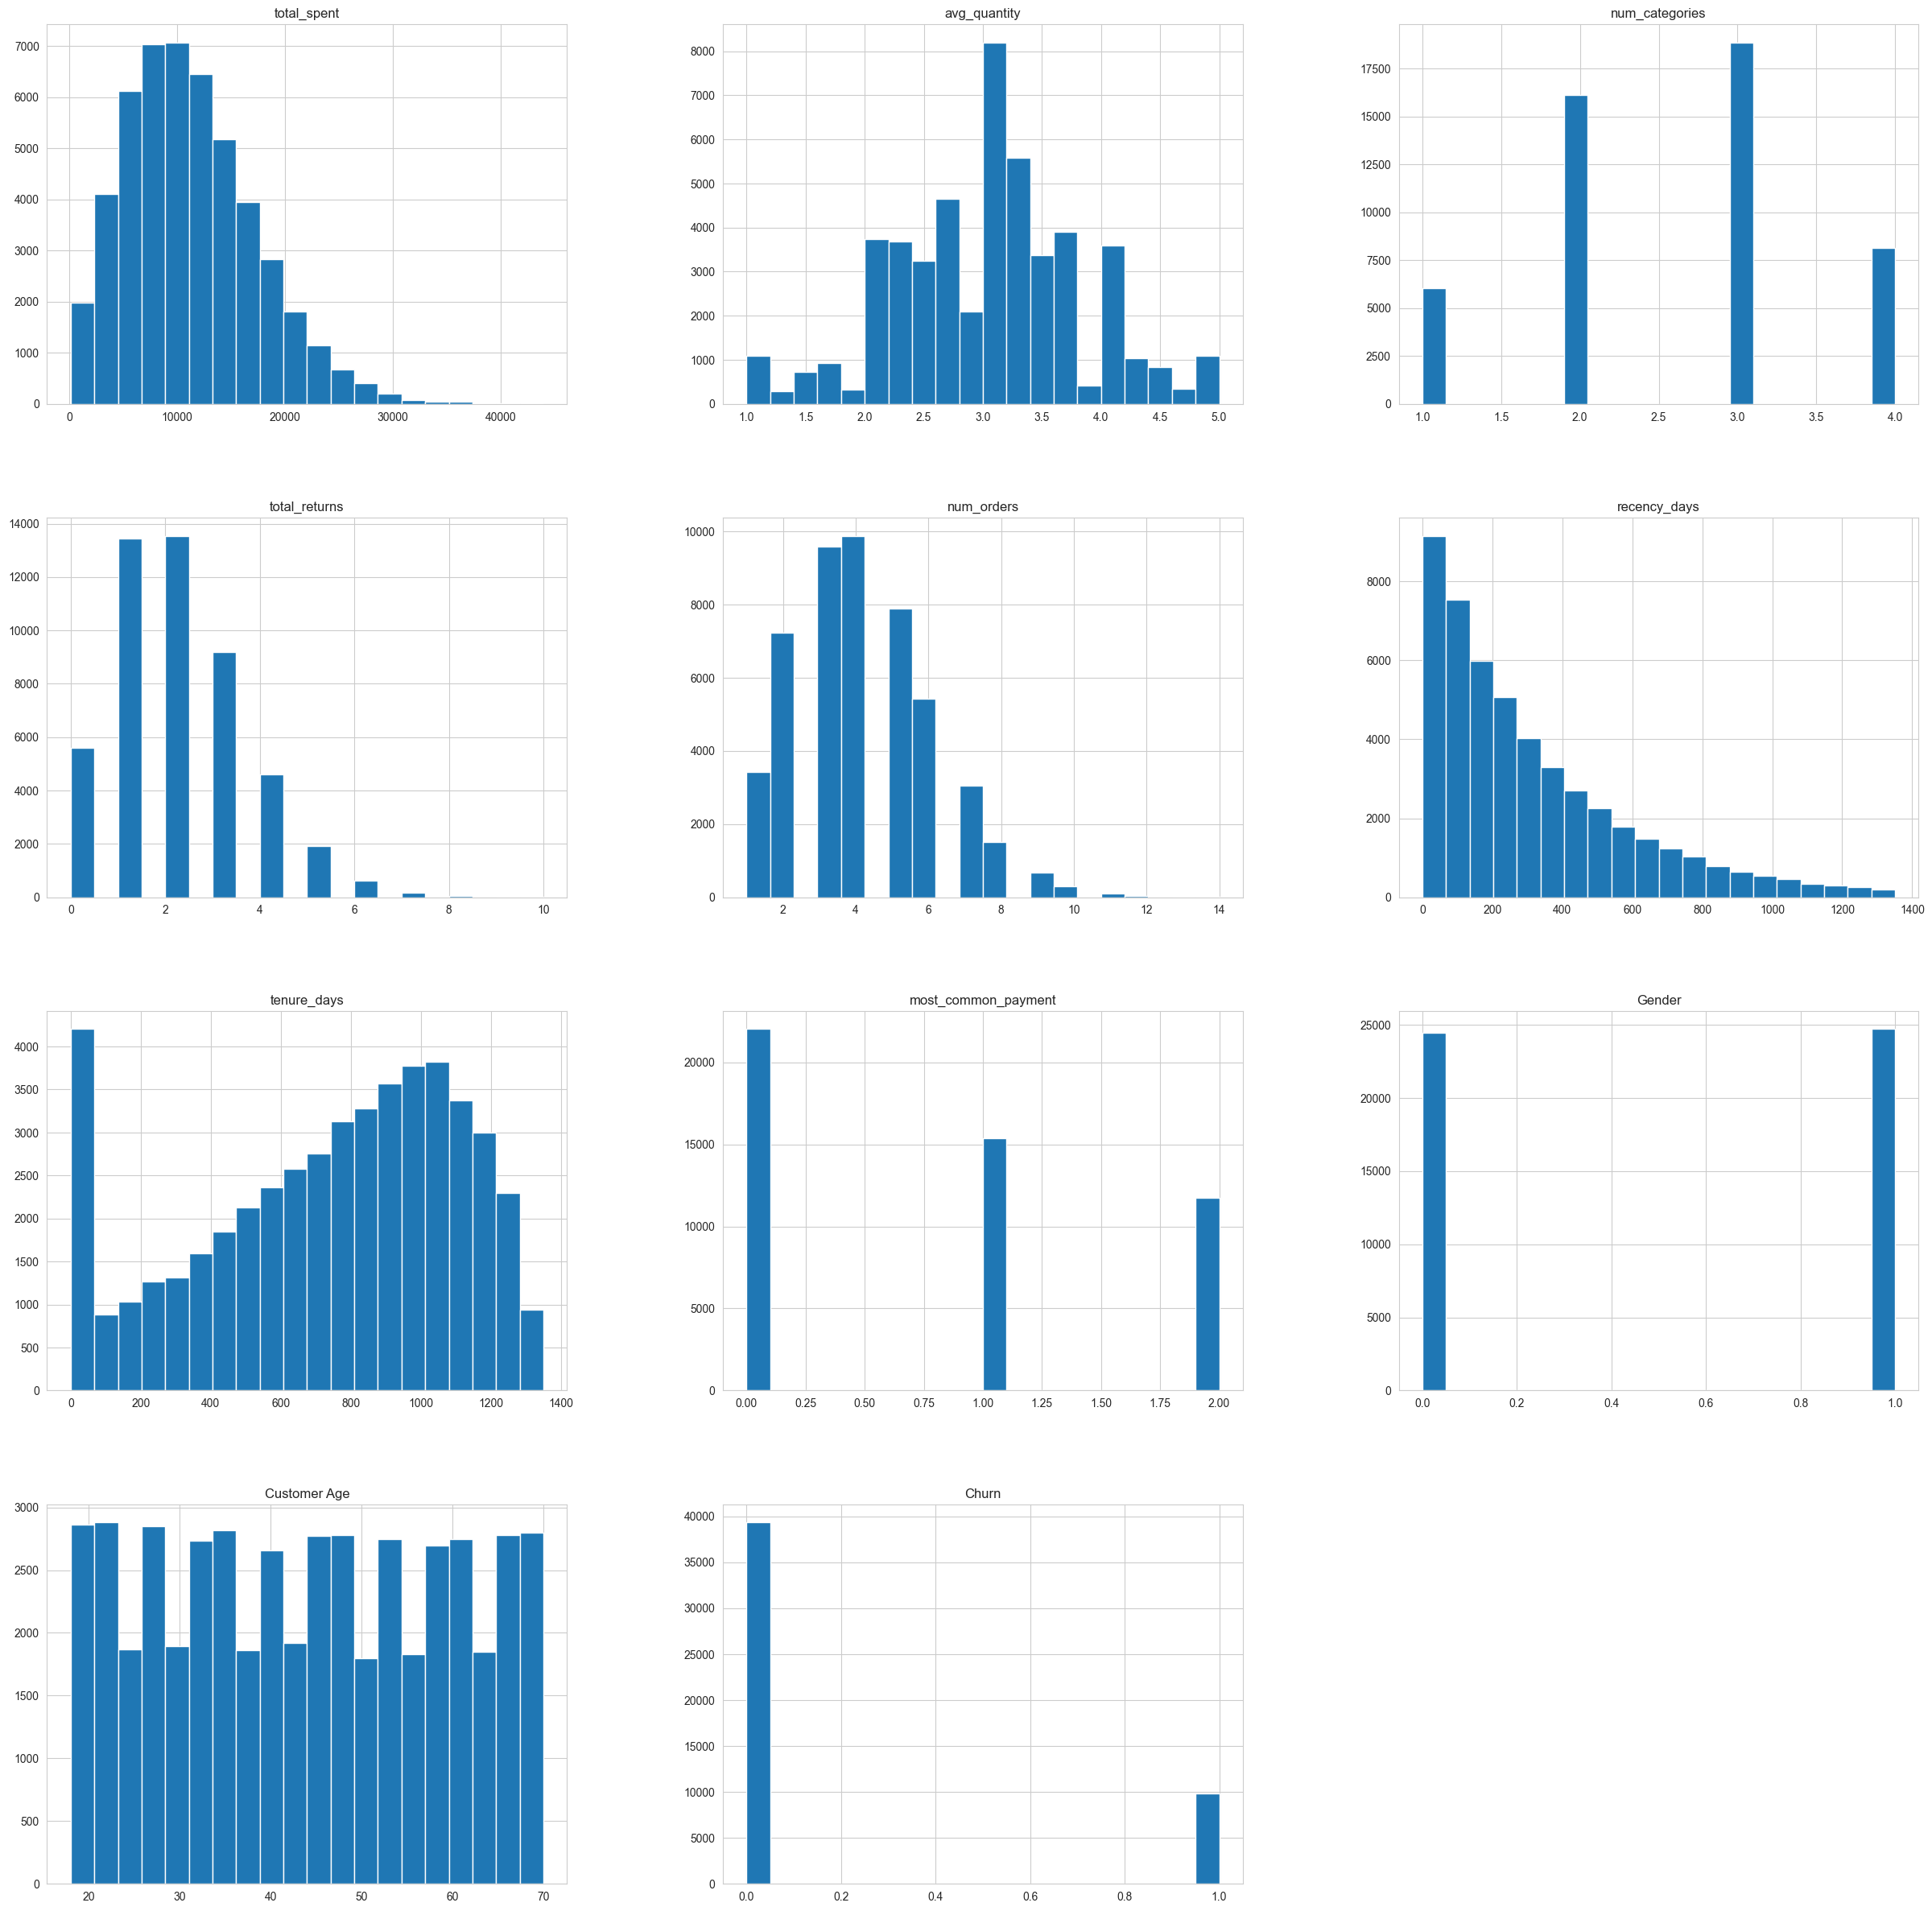

In [48]:
df.hist(bins=20, figsize=(30,30))
plt.show()

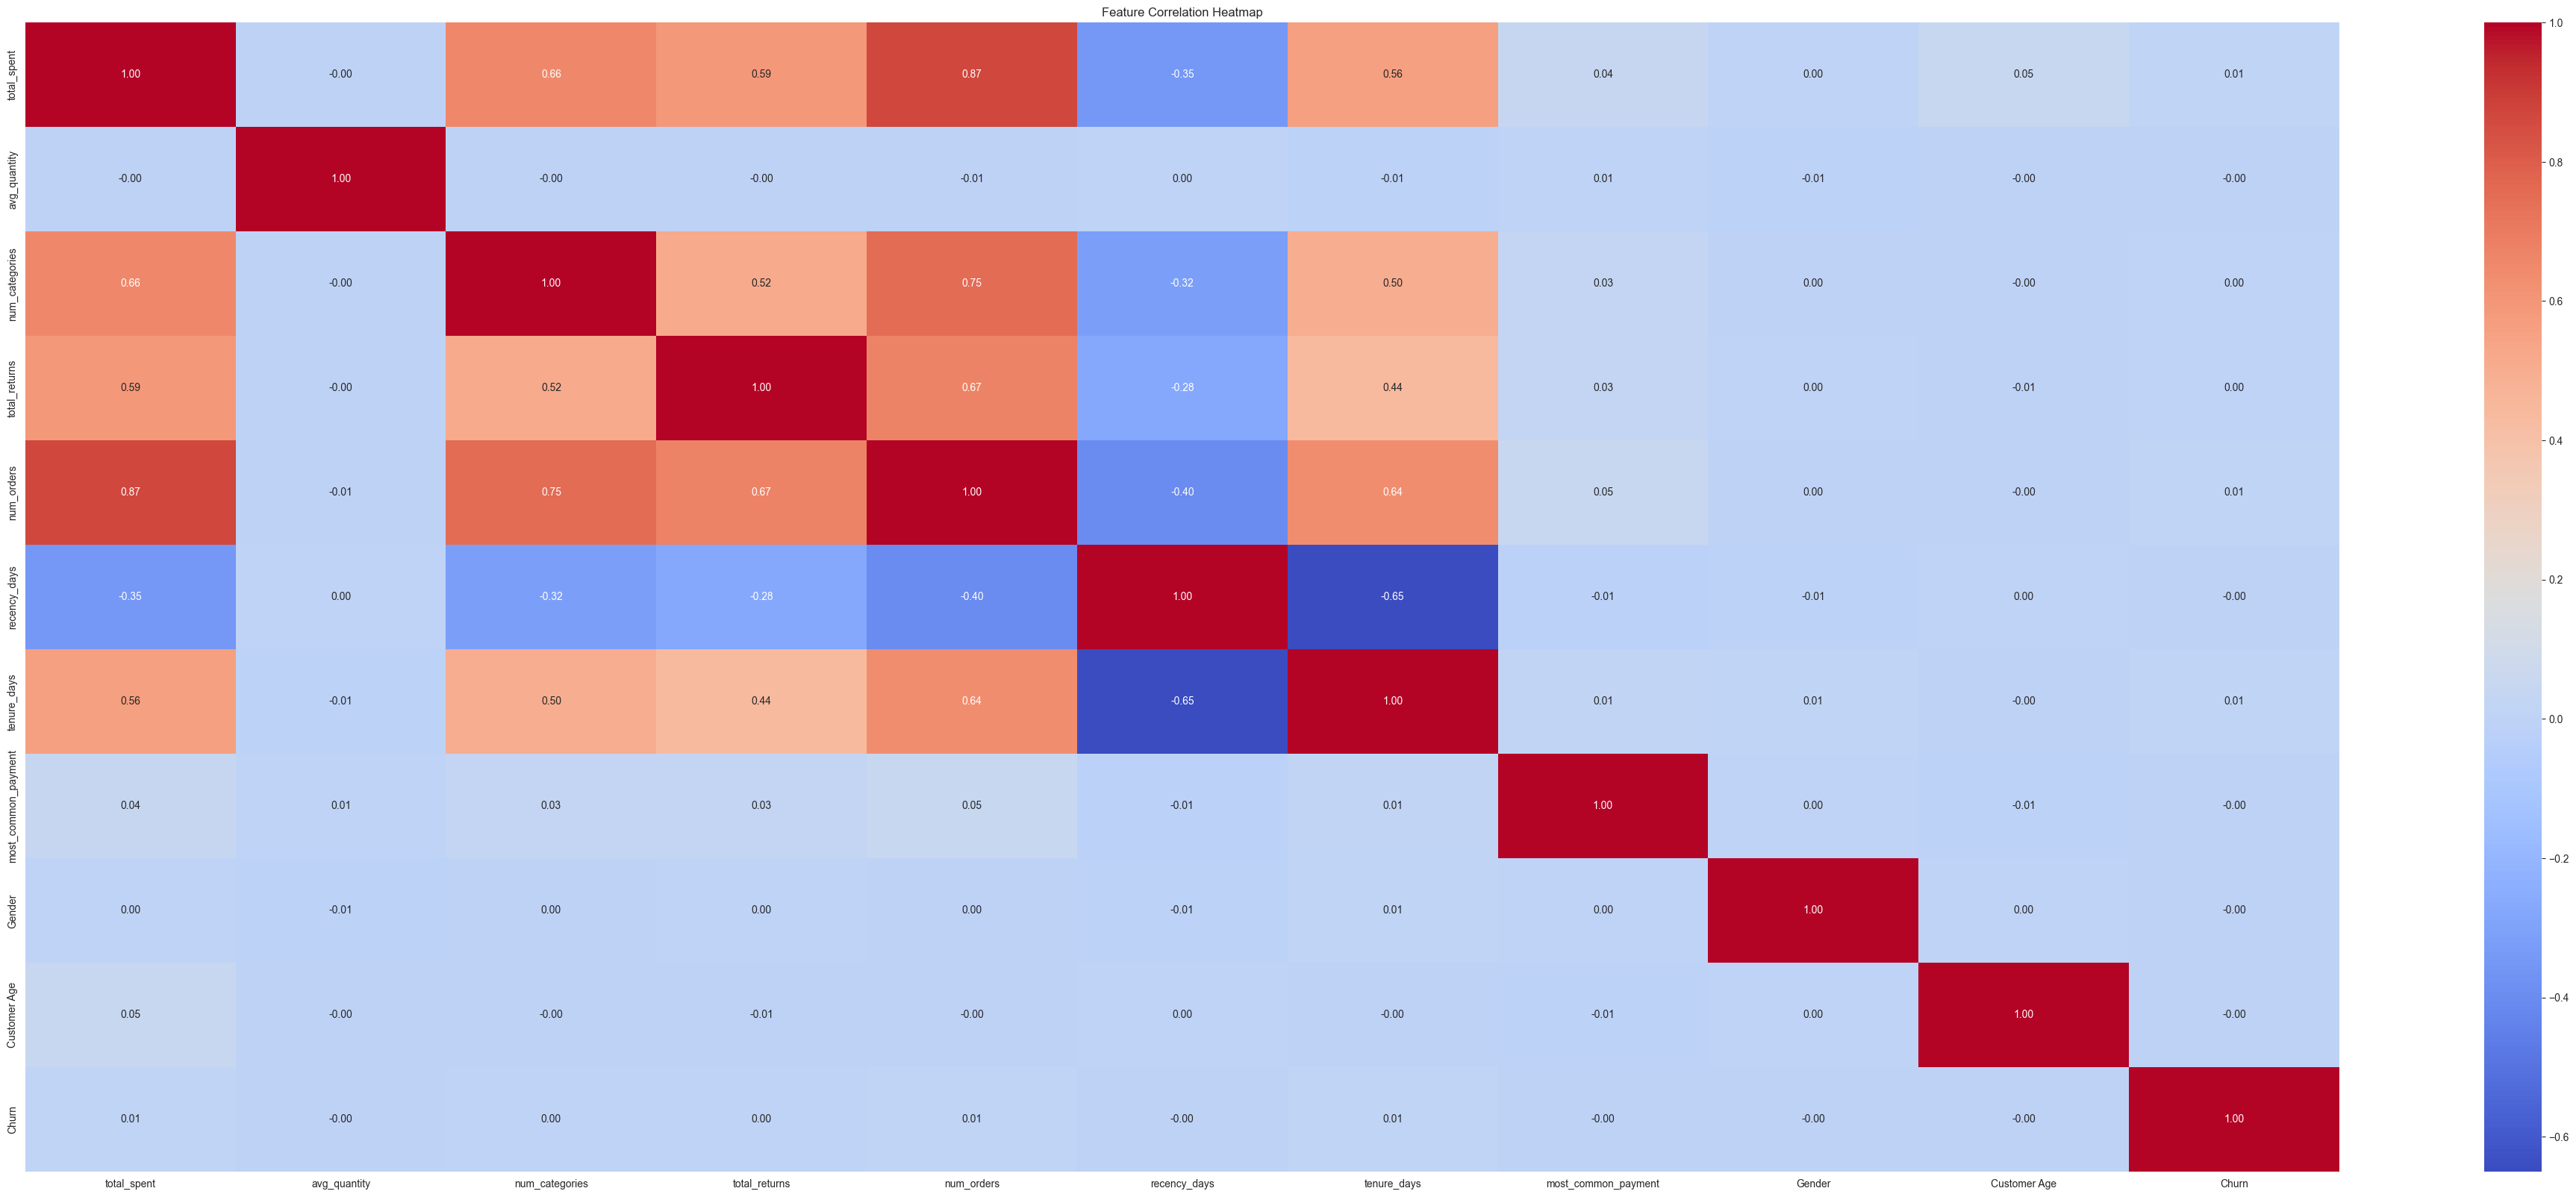

In [49]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()

correlation_matrix = df.corr(method="spearman")

plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [50]:
x = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [51]:
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=42, test_size = 0.2)

# **XGboost model**

In [52]:
model=XGBClassifier(
    n_estimators=300,
    learning_rate=0.1)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8034587995930824


# **Random Forest model**

In [53]:

model2 = RandomForestClassifier(
    n_estimators=300)

model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred2)


print("Accuracy:", accuracy)



Accuracy: 0.8040691759918617


# **Logistic Regression model**

In [54]:
model4 = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=300,

)

model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)

accuracy = accuracy_score(y_test, y_pred4)


print("Accuracy:", accuracy)



Accuracy: 0.804883011190234


c:\Users\Jana Al-Najjar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Lightgbm model**

In [55]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


model5 = LGBMClassifier(
    n_estimators=300,

)

model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)

accuracy5 = accuracy_score(y_test, y_pred5)


print("Accuracy:", accuracy5)




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7900, number of negative: 31416
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 968
[LightGBM] [Info] Number of data points in the train set: 39316, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200936 -> initscore=-1.380455
[LightGBM] [Info] Start training from score -1.380455
Accuracy: 0.803763987792472


In [56]:
import pickle

# Save
pickle.dump(model5, open('lgbm_model.pkl', 'wb'))

# Load (for testing)
model5 = pickle.load(open('lgbm_model.pkl', 'rb'))


In [57]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming you already encoded like this:
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

le_payment = LabelEncoder()
df["most_common_payment"] = le_payment.fit_transform(df["most_common_payment"])

# Save both
pickle.dump(le_gender, open('gender_le.pkl', 'wb'))
pickle.dump(le_payment, open('payment_le.pkl', 'wb'))

